In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import math
from keras import backend as K
from keras.layers.core import Activation
from keras.utils.generic_utils import get_custom_objects

def sm(x):
  return K.abs(x)*K.sigmoid(30*(x+1))*K.tanh(5*x)

def sm2(x):
  return tf.keras.activations.gelu(x)

def sm3(x):
  return x*K.sigmoid(80*(x+1))*K.tanh(x)*2

def sm4(x):
  return x*K.sigmoid(20*(x+1))*K.tanh(x)*K.tanh(10*(x+0.2))

def sm5(x):
  return 0.5*x*(K.tanh(10*x-2)+1.02)
    
get_custom_objects().update({'ca': Activation(sm)})

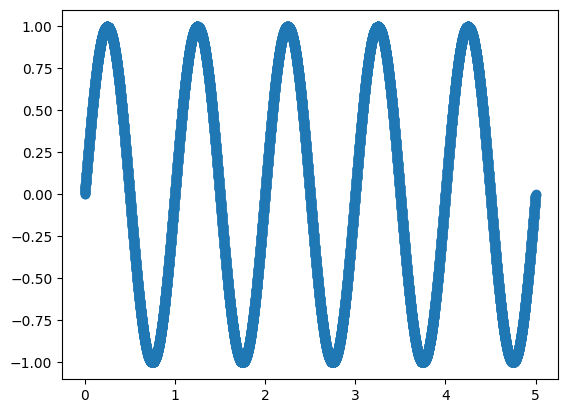

In [5]:
import matplotlib.pyplot as plt

N = 10000
x = np.linspace(0, 5, N, endpoint=True)
y = np.sin(2*np.pi *x)
# y = np.exp(x)
plt.plot(x, y, 'o')

plt.show()

In [6]:
y2 = np.array([0])
for i in range(len(y)-1):
    y2 = np.append(y2,((y[i+1]-y[i])*10000))

In [7]:
diction = {'y' :y,
           'y2' : y2}

ty = pd.DataFrame(diction)

In [8]:
n_step = 100
n_input = 2

# LSTM shape
n_lstm1 = 100
n_lstm2 = 100

# fully connected
n_hidden = 200
n_output = 100

In [9]:
ty

,y,y2
0,0.000000e+00,0.000000
1,3.141902e-03,31.419017
2,6.283772e-03,31.418707
3,9.425581e-03,31.418086
4,1.256730e-02,31.417156
...,...,...
9995,-1.256730e-02,31.415915
9996,-9.425581e-03,31.417156
9997,-6.283772e-03,31.418086
9998,-3.141902e-03,31.418707


In [10]:
train_x_list = []
train_y_list = []
for i in range(int((N-n_step)/n_step)):
    train_x = ty.iloc[n_step*i:n_step*i + n_step,:]
    train_x_list.append(train_x)

    train_y = ty.iloc[n_step*(i+1):(n_step*(i+1))+n_step,0]
    train_y_list.append(train_y)

train_data = np.array(train_x_list[:80])
train_label = np.array(train_y_list[:80])

test_data = np.array(train_x_list[80:])
test_label = np.array(train_y_list[80:])

train_x_list=0
train_y_list=0

In [11]:
lstm_network = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (n_step, n_input)),
    tf.keras.layers.LSTM(n_lstm1, return_sequences = True),
    tf.keras.layers.LSTM(n_lstm2),
    tf.keras.layers.Dense(n_hidden,activation='elu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(n_hidden*2,activation='elu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(n_output,activation='linear'),
])

lstm_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          41200     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 200)               20200     
                                                                 
 dense_1 (Dense)             (None, 400)               80400     
                                                                 
 dense_2 (Dense)             (None, 100)               40100     
                                                                 
Total params: 262,300
Trainable params: 262,300
Non-trainable params: 0
_________________________________________________________________


In [41]:
# model = tf.keras.Sequential( layers=[
#     tf.keras.layers.Dense(100,input_shape=(1,),activation='ca',kernel_initializer='he_normal'),
#     tf.keras.layers.Dense(10,activation='ca',kernel_initializer='he_normal'),
#     tf.keras.layers.Dense(1, activation='linear')
#     ])

# model.summary()

In [13]:
lstm_network.compile (optimizer='adam',
               loss='mse')

In [44]:
history = lstm_network.fit(train_data, train_label, epochs=50)

Epoch 1/50
3/3 [==============================] - 0s 28ms/step - loss: 0.0320
Epoch 2/50
3/3 [==============================] - 0s 27ms/step - loss: 0.0355
Epoch 3/50
3/3 [==============================] - 0s 28ms/step - loss: 0.0328
Epoch 4/50
3/3 [==============================] - 0s 8ms/step - loss: 0.0355
Epoch 5/50
3/3 [==============================] - 0s 11ms/step - loss: 0.0300
Epoch 6/50
3/3 [==============================] - 0s 11ms/step - loss: 0.0255
Epoch 7/50
3/3 [==============================] - 0s 11ms/step - loss: 0.0228
Epoch 8/50
3/3 [==============================] - 0s 11ms/step - loss: 0.0268
Epoch 9/50
3/3 [==============================] - 0s 12ms/step - loss: 0.0259
Epoch 10/50
3/3 [==============================] - 0s 11ms/step - loss: 0.0232
Epoch 11/50
3/3 [==============================] - 0s 11ms/step - loss: 0.0214
Epoch 12/50
3/3 [==============================] - 0s 10ms/step - loss: 0.0173
Epoch 13/50
3/3 [==============================] - 0s 11ms/ste

3/3 [==============================] - 0s 6ms/step


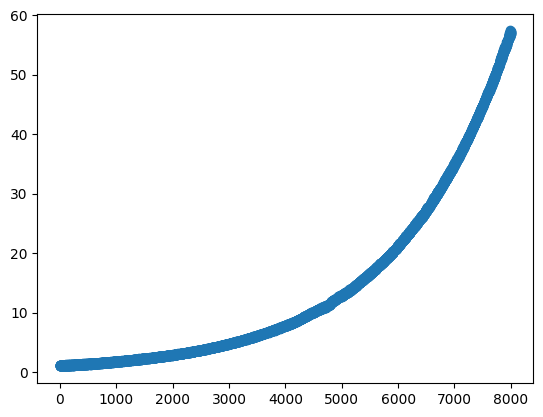

In [45]:
y_pred = lstm_network.predict(train_data)

plt.plot(range(len(y_pred.reshape(-1,1))),y_pred.reshape(-1,1),'o')

1/1 [==============================] - 0s 19ms/step


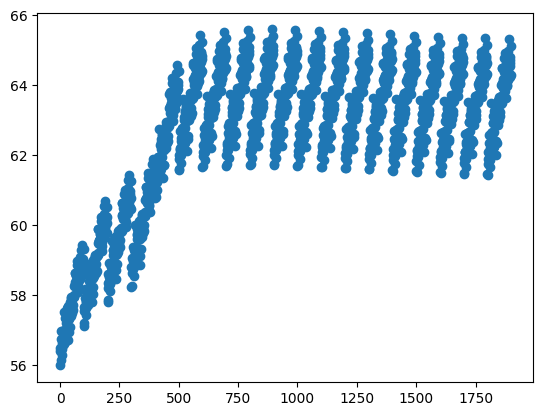

In [46]:
y_pred = lstm_network.predict(test_data)

plt.plot(range(len(y_pred.reshape(-1,1))),y_pred.reshape(-1,1),'o')

In [ ]:

test = np.linspace(-2., 7., 3000, endpoint=True)
y_test = lstm_network.predict([test])
plt.plot(test,y_test,'o')

NameError: name 'lstm_network' is not defined

In [41]:
weights,biases = model.layers[1].get_weights()
weights,biases

(array([[ 2.0925906e+00,  2.4475299e-01, -1.2194715e+00, -7.9238588e-01,
         -2.5307755e+00, -2.2172308e+00, -1.1222368e-01, -2.0953858e+00],
        [ 3.2391652e-01, -2.0742327e-01, -3.3034834e-01, -2.2199154e-01,
          6.7021072e-01,  1.7964709e-01,  1.3833033e-01,  1.2609378e-01],
        [ 2.7617779e+00,  3.4032062e-01, -1.7401999e+00, -2.9685745e+00,
         -1.4424821e+00, -1.3514466e+00, -4.7517014e-01, -7.4108100e-01],
        [-2.3440433e+00, -1.4648803e+00,  2.1829515e+00,  2.6366427e+00,
         -9.8971277e-02, -2.4814194e-01,  2.1988383e-02,  5.4847193e-01],
        [ 3.3589765e-01, -1.7045419e-01, -3.8612550e-01, -3.9348307e-01,
          2.6839462e-01,  6.1124617e-01,  2.1983902e-03,  6.5783936e-01],
        [ 2.3645003e+00,  8.2899988e-02, -2.5273645e+00, -1.7627323e+00,
         -8.1400985e-01, -3.6766899e-01, -1.3329522e-01, -3.0873916e-01],
        [ 2.2323537e+00, -1.2999508e-01, -2.6802995e+00, -2.9149435e+00,
         -1.6792758e+00, -7.9257619e-01,  5.8